In [4]:
import pandas as pd
import warnings

# data import
train_low_data = pd.read_csv('titanic/train.csv')
test_low_data = pd.read_csv('titanic/test.csv')
gender_submission = pd.read_csv('titanic/gender_submission.csv')

train_low_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test_low_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
#칼럼별 결측값 개수 구하기 : df.isnull().sum()   (isnull() 과 isna() 동일 의미 사용)
print(train_low_data.isnull().sum())
#문제를 간단하게 만들기 위해서 누락된 행을 삭제
train_low_data = train_low_data.dropna()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
train_low_data.isnull().sum()  
train_low_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


In [8]:
train_low_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


### test set에는 Survived 항목이 없음, 이 부분을 예측하는게 목표


In [9]:
test_low_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


속성 정보
=========
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

### (한글로 정리) 
<!-- 강제 줄바꿈은 space 두번 -->
Survived - 생존 여부 (0 = 사망, 1 = 생존)  
Pclass - 티켓 클래스 (1 = 1등석, 2 = 2등석, 3 = 3등석)  
Sex - 성별  
Age - 나이  
SibSp - 함께 탑승한 자녀 / 배우자 의 수  
Parch - 함께 탑승한 부모님 / 아이들 의 수  
Ticket - 티켓 번호  
Fare - 탑승 요금  
Cabin - 수하물 번호  
Embarked - 선착장 (C = Cherbourg, Q = Queenstown, S = Southampton)

In [10]:
print(train_low_data.shape)
print(test_low_data.shape) #Survived 항목외에는 동일

(183, 12)
(418, 11)


Categorical 데이터를 Numerical 로 변환   
성별은 male & female로 되어 있던 data를 numeric하게 변경  
numerical 데이터로 변경하고 싶은 categorical 컬럼을 정한 뒤,  
categorical 형 column으로 강제 형변환을 시키고   
cat.codes를 호출해 주면 자동으로 숫자형 리턴을 해주게 됩니다.

In [11]:
train_low_data['Sex_clean'] = train_low_data['Sex'].astype('category').cat.codes
test_low_data['Sex_clean'] = test_low_data['Sex'].astype('category').cat.codes

In [8]:
train_low_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_clean
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,0
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,0


### Embarked 항목 처리
Embarked 컬럼은 승객이 어느 항구에서 탔는지를 표시.

여기서 눈여겨 봐야할 부분은 train 데이터에는 NaN값이 2개 존재.  
11  Embarked     889 non-null    object 

결측치를 처리하지 않으면 학습시 잘못된 정보로 연산되고,  
후에 머신러닝 알고리즘을 돌릴 때 오류가 날 수 있기 때문에  
NaN 값에 대한 처리를 해주어야 함  
여기서는 가장 많은 데이터가 존재하는 'S'로 일괄 변경.(value_counts()로 확인)

Embarked 컬럼 역시 numeric 한 데이터로 변경하여 ‘Embarked_clean’ 컬럼으로 추가

In [9]:
print(train_low_data['Embarked'].isnull().sum())
print(test_low_data['Embarked'].isnull().sum())
print(train_low_data['Embarked'].value_counts())

0
0
S    116
C     65
Q      2
Name: Embarked, dtype: int64


In [10]:
#원본 df를 보존할 필요가 없이 바로 결측값을 채워넣기 해서 수정하고 싶으면 inplace=True 옵션으로 설정.
train_low_data['Embarked'].fillna('S', inplace=True)

train_low_data['Embarked_clean'] = train_low_data['Embarked'].astype('category').cat.codes
test_low_data['Embarked_clean'] = test_low_data['Embarked'].astype('category').cat.codes

In [11]:
train_low_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_clean,Embarked_clean
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,2
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,2
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,0,2
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,0,2


In [12]:
test_low_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_clean,Embarked_clean
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,2


### 홀로 탑승여부
혼자 탄 경우와 그렇지 않은 경우 생존에 영향을 미칠것으로 판단  
Family 항목을 참고하여 홀로 탑승 확인
SibSp Parch 두 항목이 결구 가족과 함께 여부이므로 두 항목을 합하여 확인

In [13]:
train_low_data['Family'] = 1 + train_low_data['SibSp'] + train_low_data['Parch']
test_low_data['Family'] = 1 + test_low_data['SibSp'] + test_low_data['Parch']

In [14]:
train_low_data['Solo'] = train_low_data['Family'] == 1
test_low_data['Solo'] = test_low_data['Family'] == 1

In [15]:
train_low_data['Solo'] = train_low_data['Solo'].map(lambda x : 1 if x else 0)
test_low_data['Solo'] = test_low_data['Solo'].map(lambda x : 1 if x else 0)
train_low_data['Solo']

1      0
3      0
6      1
10     0
11     1
      ..
871    0
872    1
879    0
887    1
889    1
Name: Solo, Length: 183, dtype: int64

### 요금 항목
요금 컬럼은 Numeric한 값보다는 단순화하기 위하여 Binning 기법을 활용
pd.qcut을 활용하여 5구간으로 나누어 주어 binning.

(1) pd.cut()으로 동일 길이로 나누어서 범주를 만든 후 GroupBy()로 그룹별 통계량 구하기  
(2) pd.qcut()으로 동일 개수로 나누어서 범주를 만든 후 GroupBy()로 그룹별 통계량 구하기  
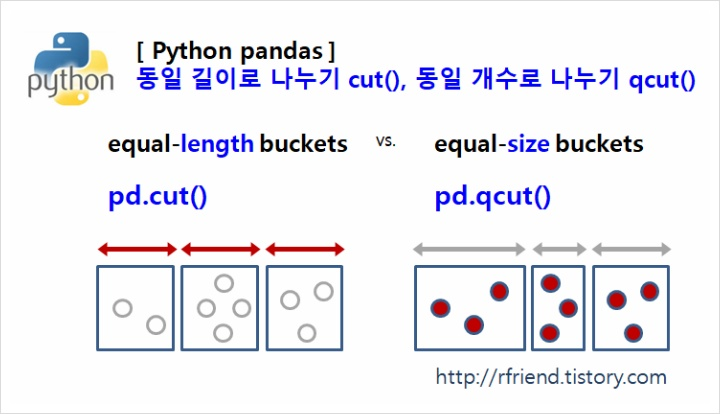  

Binning을 한 후에 Numeric한 값으로 변경.

In [16]:
train_low_data['FareBin'] = pd.qcut(train_low_data['Fare'], 5)
test_low_data['FareBin'] = pd.qcut(test_low_data['Fare'], 5)

print(train_low_data['FareBin'].value_counts())

(-0.001, 26.55]       41
(76.841, 110.883]     38
(51.786, 76.841]      37
(110.883, 512.329]    35
(26.55, 51.786]       32
Name: FareBin, dtype: int64


In [17]:
#범위에 대한 정보가 정수 data로 변환
train_low_data['Fare_clean'] = train_low_data['FareBin'].astype('category').cat.codes
test_low_data['Fare_clean'] = test_low_data['FareBin'].astype('category').cat.codes

train_low_data['Fare_clean'].value_counts()

0    41
3    38
2    37
4    35
1    32
Name: Fare_clean, dtype: int64

### Name에 대한 처리
자세히 보면 Name 항목에는 단순한 이름외에 여러가지 정보가 들어가 있음  
이 정보를 축출하여 카테고리화 해주면 학습시 참고가 됨  
Title은 ‘Name’ 칼럼에서 ~씨와 같은 title을 추출하여 새롭게 생성해주는 컬럼  
여기서 주의해야할 점은 Title을 추출하여 카테고리와 해주면,  
데이터의 총 량에 비하여 너무 복잡도가 올라가는 경향이 있기 때문에  
모수가 적은 title은 단일화

### 원하는 문자열 추출 str.extract()
그룹 ()을 꼭 지정해서 패턴을 입력해야 하며, 패턴에 맞는 단어가 없을 시 NaN이 출력  
expand가 True인 경우 출력을 하나의 column단위로 나타내고, False의 경우 label단위로 출력.  
추출그룹이 많을 땐 자동으로 데이터프레임 처리

### 파이썬 정규 표현식
정규표현식(Regular Expressions)은 복잡한 문자열을 처리할 때 사용하는 기법  
파이썬만의 고유 문법이 아니라 문자열을 처리하는 모든 곳에서 사용  
(정규 표현식을 배우는 것은 파이썬을 배우는 것과는 또 다른 영역의 과제)  

※ 정규 표현식은 줄여서 간단히 "정규식"이라고도 표현.  

정규표현식은 소프트웨어에 따라서 방식이나 지원 범위가 다를 수 있습니다.

^The	The로 시작하는 문자열
of despair$	of despair로 끝나는 문자열
^abc$	abc로 시작하고 abc로 끝나는 문자열 (abc 라는 문자열도 해당됨)
notice	notice가 들어 있는 문자열

ab*	a 다음에 b가 0개 이상 (a, ab, abbb 등등)
ab+	a 다음에 b가 1개 이상 (ab, abbb 등등)
ab?	a 다음에 b가 있거나 없거나 (ab 또는 a)

ab{2}	a 다음에 b가 2개 있는 문자열 (abb)
ab{2,}	a 다음에 b가 2개 이상 (abb, abbbb 등등)
ab{3,5}	a 다음에 b가 3개에서 5개 사이 (abbb, abbbb, 또는 abbbbb)
*, +, ?는 각각 {0,}, {1,}, {0,1}과 같습니다.

( )는 문자열을 묶음 처리할 때 사용
a(bc)*	a 다음에 bc가 0개 이상 (묶음 처리)
a(bc){1,5}	a 다음에 bc가 1개에서 5개 사이

hi|hello	hi나 hello가 들어 있는 문자열
(b|cd)ef	bef 또는 cdef
(a|b)*c	a와 b가 섞여서 여러번 나타나고 그뒤에 c가 붙어있는 패턴

. (점)	임의의 한 문자
^.{3}$	3문자로만 되어 있는 문자열

[ ]	괄호 안에 있는 내용 중 임의의 한 문자
[^ ]	첫문자로 ^를 쓰면 괄호 내용의 부정. 즉 괄호 안에 포함되지 않는 한 문자
[ab]	a 또는 b (a|b 와 동일한 표현)
[a-d]	소문자 a에서 d까지 (a|b|c|d 또는 [abcd] 와 동일)
^[a-zA-Z]	영문자로 시작하는 문자열
[0-9]%	% 문자 앞에 하나의 숫자가 붙어 있는 패턴
%[^a-zA-Z]%	두 % 문자 사이에 영문자가 없는 패턴

특수 문자 자체를 검색하기 및 사용하기
\^	^	\.	.
\[	[	\$	$
\(	(	\)	)
\|	|	\*	*
\+	+	\?	?
\{	{	\\	\
\n	줄넘김 문자	\r	리턴 문자
\w	알파벳과 _ (언더바)	\W	알파벳과 _ 가 아닌 것
\s	빈 공간(space)	\S	빈 공간이 아닌 것
\d	숫자	\D	숫자가 아닌 것
\b	단어와 단어 사이의 경계	\B	단어 사이의 경계가 아닌 것
\t	Tab 문자	\xnn	16진수 nn에 해당하는 문자
[ ] 안에서는 특수 문자가 모두 효력을 잃게 됩니다.

검색 + 치환을 위한 하부식(부분식)
( )로 둘러싼 부분은 각각 하나의 덩어리로 취급해서,
검색시 ( ) 안에 해당되는 내용들을 변경할 내용에서 그대로 가져다 이용할 수 있습니다.
검색된 각각의 ( )안에 해당되는 내용은 변경할 내용에서 $1, $2, .. 등으로 지정해서 쓸 수 있습니다.
예제) mp3파일 이름 바꾸기
검색 : (.*) - (.*)\.mp3 .*은 길이에 상관없이 임의의 문자열, \.은 점
치환 : $2 - $1.mp3 앞에서 검색한 ( )안에 해당되는 내용끼리 순서 바꾸기
ex) "제목 - 연주자.mp3" Þ "연주자 - 제목.mp3"
앞에서 정의한 하부식을 다시 활용하기 (제가 잘못 이해한 것일 수도 있는데)
\n은 ( ) 하부식 중에서 n번째 하부식을 가리킵니다.
예제) (.+)\1+
\1로 되어 있으니까 첫번째 부분식 (.+)를 가리킵니다. 위 내용을 해석하자면, 일단 (.+)가 있으니까 이에 해당되는 내용을 찾고, \1+이 있으니까 첫번째 부분식 (.+)와 똑같은 내용이 그 뒤에 1번 이상 있는 문자열을 찾습니다.
예제) abab같은 문자열이 위에 해당되는데, 일단 (.+) 즉 임의의 문자열 ab를 찾고 그 뒤에 \1+로 첫번째 부분식을 다시 1번 이상 있는 것을 찾으니까 뒤의 ab가 이에 해당합니다.

변경자 ? 검색 방식 변경
(?i)	대소문자 무시 (기본값)
(?-i)	대소문자 구분
(?g)	"greedy" 모드로 전환 (기본값)
(?-g)	"greedy" 모드 해제, 따라서 "+"는 "+?"과 동일한 것으로 인식

### 파이썬 정규 표현식 - 아래 코드에 필요한정규식 부분만
A-Za-z 대문자 로 시작 소문자로연결되는 경우  
ab+	a 다음에 b가 1개 이상 (ab, abbb 등등)  
[A-Za-z]+ 대문자 로 시작 소문자가 1개 이상 있음  

특수 문자 자체를 검색하기 및 사용하기  
\\.	   ->    '.'  
을 찾음

* 결국 대문자로 시작 이후 1개의상의 소문자가 있고 끝에 '.'이 있는 경우

In [18]:
train_low_data['Title'] = train_low_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test_low_data['Title'] = test_low_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

#replace 이후 List에 있는 내용 외에는 Others로
train_low_data['Title'] = train_low_data['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')

train_low_data['Title'].value_counts()

Mr        81
Miss      44
Mrs       38
Other     10
Master     7
Mlle       2
Mme        1
Name: Title, dtype: int64

In [19]:
#Mlle과 Ms, Mme는 1~2개 밖에 없으므로, 이 역시 단일화 해주는 작업을 진행
train_low_data['Title'] = train_low_data['Title'].replace('Mlle', 'Miss')
train_low_data['Title'] = train_low_data['Title'].replace('Ms', 'Miss')
train_low_data['Title'] = train_low_data['Title'].replace('Mme', 'Mrs')

train_low_data['Title'].value_counts()

Mr        81
Miss      46
Mrs       39
Other     10
Master     7
Name: Title, dtype: int64

In [20]:
test_low_data['Title'] = test_low_data['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')

test_low_data['Title'] = test_low_data['Title'].replace('Mlle', 'Miss')
test_low_data['Title'] = test_low_data['Title'].replace('Ms', 'Miss')
test_low_data['Title'] = test_low_data['Title'].replace('Mme', 'Mrs')

test_low_data['Title'].value_counts()

Mr        240
Miss       79
Mrs        72
Master     21
Other       6
Name: Title, dtype: int64

Title 역시 Numeric한 값들로 변경하는 과정을 진행

In [21]:
train_low_data['Title_clean'] = train_low_data['Title'].astype('category').cat.codes
test_low_data['Title_clean'] = test_low_data['Title'].astype('category').cat.codes

###Age에 대한 고민  
나이는 빈 값이 상당히 많은 컬럼이지만,  
그래프로 확인해보면 나이의 경우 선형적인 분포를 보이고 있지는 않지만  
30세 이후부터는 나이가 많을 수록 생존률이 낮아진다는 점  
그리고 아주 나이가 어린 경우에는 생존률이 꽤 높은 반면  
10대의 생존률이 낮다는 점을 확인할 수 있음  
이는 동승한 가족의 수 부모의 수와 연관지어서 분석해 볼 수도 있을 것으로 판단 됨  

따라서 Age에 대한 pre-processing 전략이 상당히 중요하다는 것을 알 수 있음  

여러 방법을 확인하고 다른 Kaggle Kernel도 참조를 해본 결과  
NaN값에 대한 처리는 Title로 Group화 한 Age의 Median 값으로 채워주는 전략으로  
가장 높은 점수를 얻을 수 있었음.

In [22]:
import matplotlib.pyplot as plt
survived = train_low_data[train_low_data["Survived"] == 1]
survived["Age"].plot.hist(alpha=0.6, color = 'blue', bins=50)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

In [23]:
print(train_low_data['Age'].isnull().sum())
print(test_low_data['Age'].isnull().sum())

0
86


"Title"을 기준으로 그룹화하여 해당 그룹의 중앙값을 취함  
mean(): 그룹 내 non-NA 값들의 평균값  
median(): 그룹 내 non-NA 값들의 중앙값
만약 원본 df DataFrame 을 보존할 필요가 없이 바로 결측값을  
채워넣기 해서 수정하고 싶으면 inplace=True 옵션을 설정.

In [24]:
train_low_data["Age"].fillna(train_low_data.groupby("Title")["Age"].transform("median"), inplace=True)
test_low_data["Age"].fillna(test_low_data.groupby("Title")["Age"].transform("median"), inplace=True)

<span style="color:red">중요한 부분</span>  
Age의 구간화 (Binning)  
5세 단위로 자르고  
50대는 10세단위  
그리고 60세이상은 모두 묶어서 Binning을 해주었음.

In [25]:
#train_low_data
train_low_data.loc[   train_low_data['Age'] <= 10, 'Age_clean'] = 0
train_low_data.loc[(  train_low_data['Age'] > 10) & (  train_low_data['Age'] <= 16), 'Age_clean'] = 1
train_low_data.loc[(  train_low_data['Age'] > 16) & (  train_low_data['Age'] <= 20), 'Age_clean'] = 2
train_low_data.loc[(  train_low_data['Age'] > 20) & (  train_low_data['Age'] <= 26), 'Age_clean'] = 3
train_low_data.loc[(  train_low_data['Age'] > 26) & (  train_low_data['Age'] <= 30), 'Age_clean'] = 4
train_low_data.loc[(  train_low_data['Age'] > 30) & (  train_low_data['Age'] <= 36), 'Age_clean'] = 5
train_low_data.loc[(  train_low_data['Age'] > 36) & (  train_low_data['Age'] <= 40), 'Age_clean'] = 6
train_low_data.loc[(  train_low_data['Age'] > 40) & (  train_low_data['Age'] <= 46), 'Age_clean'] = 7
train_low_data.loc[(  train_low_data['Age'] > 46) & (  train_low_data['Age'] <= 50), 'Age_clean'] = 8
train_low_data.loc[(  train_low_data['Age'] > 50) & (  train_low_data['Age'] <= 60), 'Age_clean'] = 9
train_low_data.loc[   train_low_data['Age'] > 60, 'Age_clean'] = 10

#test_low_data
test_low_data.loc[ test_low_data['Age'] <= 10, 'Age_clean'] = 0
test_low_data.loc[(test_low_data['Age'] > 10) & (test_low_data['Age'] <= 16), 'Age_clean'] = 1
test_low_data.loc[(test_low_data['Age'] > 16) & (test_low_data['Age'] <= 20), 'Age_clean'] = 2
test_low_data.loc[(test_low_data['Age'] > 20) & (test_low_data['Age'] <= 26), 'Age_clean'] = 3
test_low_data.loc[(test_low_data['Age'] > 26) & (test_low_data['Age'] <= 30), 'Age_clean'] = 4
test_low_data.loc[(test_low_data['Age'] > 30) & (test_low_data['Age'] <= 36), 'Age_clean'] = 5
test_low_data.loc[(test_low_data['Age'] > 36) & (test_low_data['Age'] <= 40), 'Age_clean'] = 6
test_low_data.loc[(test_low_data['Age'] > 40) & (test_low_data['Age'] <= 46), 'Age_clean'] = 7
test_low_data.loc[(test_low_data['Age'] > 46) & (test_low_data['Age'] <= 50), 'Age_clean'] = 8
test_low_data.loc[(test_low_data['Age'] > 50) & (test_low_data['Age'] <= 60), 'Age_clean'] = 9
test_low_data.loc[ test_low_data['Age'] > 60, 'Age_clean'] = 10

### Cabin
수하물 번호를 분석하기 위해 우선 Numeric한 값으로 변경.   
Cabin 컬럼에서는 알파벳 뒤에 붙는 Numeric한 값은 무시하고  
Alphabet만 가져오는 방법 적용  
alphbet에 따라 정수로 변환

In [26]:
train_low_data['Cabin'].str[:1].value_counts()

C    51
B    43
D    31
E    30
A    12
F    11
G     4
T     1
Name: Cabin, dtype: int64

In [27]:
mapping = {
    'A': 0,
    'B': 1,
    'C': 2,
    'D': 3,
    'E': 4,
    'F': 5,
    'G': 6,
    'T': 7
}

train_low_data['Cabin_clean'] = train_low_data['Cabin'].str[:1]
train_low_data['Cabin_clean'] = train_low_data['Cabin_clean'].map(mapping)

test_low_data['Cabin_clean'] = test_low_data['Cabin'].str[:1]
test_low_data['Cabin_clean'] = test_low_data['Cabin_clean'].map(mapping)

In [28]:
survived = train_low_data[train_low_data["Survived"] == 1]
survived["Cabin_clean"].plot.hist(alpha=0.6, color = 'blue', bins=50)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

### Cabin
결측치를 제외하고 확인한 결과 수화물 번호와 생존과  
일정부분 관계가 있어 보임  
하지만 Cabin 컬럼 역시 NaN 값이 매우 많은 컬럼  
티켁 종류(몇 등석)에 따라 짐이 분류 되었다느 가정하에  
Cabin 값은 Pclass로 Group한 median값을 일괄 적용

In [29]:
train_low_data["Cabin_clean"].fillna(train_low_data.groupby("Pclass")["Cabin_clean"].transform("median"), inplace=True)
test_low_data["Cabin_clean"].fillna(test_low_data.groupby("Pclass")["Cabin_clean"].transform("median"), inplace=True)


#train_low_data['Cabin_clean'] = train_low_data.groupby('Pclass')['Cabin_clean'].transform('median')
#test_low_data['Cabin_clean'] = test_low_data.groupby('Pclass')['Cabin_clean'].transform('median')

In [30]:
print(train_low_data['Cabin_clean'].value_counts())
print(test_low_data['Cabin_clean'].value_counts())

2    51
1    43
3    31
4    30
0    12
5    11
6     4
7     1
Name: Cabin_clean, dtype: int64
5.0    308
2.0     62
1.0     18
3.0     13
4.0      9
0.0      7
6.0      1
Name: Cabin_clean, dtype: int64


In [31]:
train_low_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Sex_clean,Embarked_clean,Family,Solo,FareBin,Fare_clean,Title,Title_clean,Age_clean,Cabin_clean
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,2,0,"(51.786, 76.841]",2,Mrs,3,6.0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,2,2,0,"(51.786, 76.841]",2,Mrs,3,5.0,2
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,...,1,2,1,1,"(51.786, 76.841]",2,Mr,2,9.0,4
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,...,0,2,3,0,"(-0.001, 26.55]",0,Miss,1,0.0,6
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,...,0,2,1,1,"(-0.001, 26.55]",0,Miss,1,9.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,...,0,2,3,0,"(51.786, 76.841]",2,Mrs,3,8.0,3
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,...,1,2,1,1,"(-0.001, 26.55]",0,Mr,2,5.0,1
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,...,0,0,2,0,"(76.841, 110.883]",3,Mrs,3,9.0,2
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,...,0,2,1,1,"(26.55, 51.786]",1,Miss,1,2.0,1


In [32]:
test_low_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Sex_clean,Embarked_clean,Family,Solo,FareBin,Fare_clean,Title,Title_clean,Age_clean,Cabin_clean
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,...,1,1,1,1,"(7.796, 11.025]",1,Mr,2,5.0,5.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,...,0,2,2,0,"(-0.001, 7.796]",0,Mrs,3,8.0,5.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,...,1,1,1,1,"(7.796, 11.025]",1,Mr,2,10.0,5.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,...,1,2,1,1,"(7.796, 11.025]",1,Mr,2,4.0,5.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,...,0,2,3,0,"(11.025, 21.438]",2,Mrs,3,3.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,28.5,0,0,A.5. 3236,8.0500,NaN,...,1,2,1,1,"(7.796, 11.025]",1,Mr,2,4.0,5.0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,...,0,0,1,1,"(46.62, 512.329]",4,Other,4,6.0,2.0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,...,1,2,1,1,"(-0.001, 7.796]",0,Mr,2,6.0,5.0
416,1308,3,"Ware, Mr. Frederick",male,28.5,0,0,359309,8.0500,NaN,...,1,2,1,1,"(7.796, 11.025]",1,Mr,2,4.0,5.0


In [33]:
feature = [
    'Pclass',
    'SibSp',
    'Parch',
    'Sex_clean',
    'Embarked_clean',
    'Family',
    'Solo',
    'Title_clean',
    'Age_clean',
    'Cabin_clean',
    'Fare_clean',
]

label = [
    'Survived',
]

In [34]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_ = train_low_data[feature]
Y_ = train_low_data[label]

X_train, X_test, Y_train, Y_test = train_test_split(X_, Y_, test_size=0.2, random_state=1)

In [35]:
X_train

,Pclass,SibSp,Parch,Sex_clean,Embarked_clean,Family,Solo,Title_clean,Age_clean,Cabin_clean,Fare_clean
632,1,0,0,1,0,1,1,4,5.0,1,1
700,1,1,0,0,0,2,0,3,2.0,2,4
772,2,0,0,0,2,1,1,3,9.0,4,0
712,1,1,0,1,2,2,0,2,8.0,2,2
591,1,1,0,0,0,2,0,3,9.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...
647,1,0,0,1,0,1,1,4,9.0,0,1
679,1,0,1,1,0,2,0,2,5.0,1,4
345,2,0,0,0,2,1,1,1,3.0,5,0
690,1,1,0,1,2,2,0,2,5.0,1,2


In [36]:
Y_train

,Survived
632,1
700,1
772,0
712,1
591,1
...,...
647,1
679,1
345,1
690,1


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 모델 생성

model = Sequential()

model.add(Dense(256, input_shape=(None ,11), activation = "relu"))
model.add(Dense(128, activation = "relu"))
model.add(Dense(64, activation = "relu"))
model.add(Dense(32, activation = "relu"))
model.add(Dense(16, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))


'''
model.add(Dense(16, input_shape=(None ,11), activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))
'''

'''
model.add(Dense(1, input_shape=(None ,11), activation = "sigmoid"))
'''
# 모델 Compile
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
model.compile(optimizer=opt,
    loss = "binary_crossentropy",
    metrics=["accuracy"])

model.summary()

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

#hist = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=300)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

hist = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=500, callbacks=[early_stopping_callback])


plt.figure(figsize=(14,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss','val_loss', 'acc','val_acc'])
plt.show()

In [3]:
test_data = test_low_data[feature]
test_data

NameError: name 'feature' is not defined

In [ ]:
prediction = model.predict(test_data)
prediction

In [ ]:
test_data = test_low_data[feature]
predict = model.predict(test_data)
predicted = tf.cast(predict > 0.5, dtype=tf.int32)
predicted = predicted.numpy()
#cast_f = lambda x:0 if x>=0.5 else 1
#predict = predict.apply(cast_f)

result =pd.DataFrame({'PassengerId': test_low_data['PassengerId'],'Survived': predicted.flatten()})
result.to_csv('result.csv', index=False)

'''
test_data = test_low_data[feature]
prediction = model.predict(test_data)
submission = pd.DataFrame({
        "PassengerId": test_low_data["PassengerId"],
        "Survived": prediction
    })
 
submission.to_csv('submission_test1.csv', index=False)
submission = pd.read_csv('submission_test1.csv')
submission.head()
'''

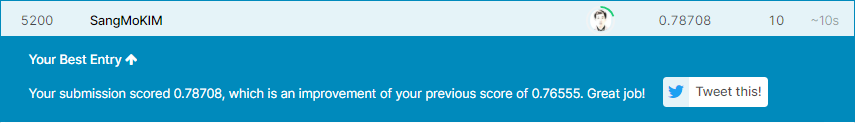